# Прогнозирование стоимости автомобиля по характеристикам

<img src="BMW.JPG">

### Цель

Создание модели, которая будет предсказывать стоимость подержанного автомобиля по его характеристикам

### Задачи

1. Разведочный анализ тестовых данных 
2. Сбор данных о характеристиках и ценах подержанных автомобилей
3. Разведочный анализ тренировочных данных
4. Обработка данных
5. Обучение модели и предсказание цен тестовых авто

## 1. Разведочный анализ тестовых данных

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3837 entries, 0 to 3836
Data columns (total 23 columns):
bodyType                3837 non-null object
brand                   3837 non-null object
color                   3837 non-null object
fuelType                3837 non-null object
modelDate               3837 non-null float64
name                    3837 non-null object
numberOfDoors           3837 non-null float64
productionDate          3837 non-null float64
vehicleConfiguration    3837 non-null object
vehicleTransmission     3837 non-null object
engineDisplacement      3837 non-null object
enginePower             3837 non-null object
description             3837 non-null object
mileage                 3837 non-null float64
Комплектация            3837 non-null object
Привод                  3837 non-null object
Руль                    3837 non-null object
Состояние               3837 non-null object
Владельцы               3837 non-null object
ПТС                     3837 non-n

In [3]:
test.isnull().sum()

bodyType                   0
brand                      0
color                      0
fuelType                   0
modelDate                  0
name                       0
numberOfDoors              0
productionDate             0
vehicleConfiguration       0
vehicleTransmission        0
engineDisplacement         0
enginePower                0
description                0
mileage                    0
Комплектация               0
Привод                     0
Руль                       0
Состояние                  0
Владельцы                  0
ПТС                        0
Таможня                    0
Владение                2084
id                         0
dtype: int64

In [4]:
test.head()

,bodyType,brand,color,fuelType,modelDate,name,numberOfDoors,productionDate,vehicleConfiguration,vehicleTransmission,...,mileage,Комплектация,Привод,Руль,Состояние,Владельцы,ПТС,Таможня,Владение,id
0,седан,BMW,чёрный,дизель,2016.0,520d 2.0d AT (190 л.с.),4.0,2017.0,SEDAN AUTOMATIC 2.0,автоматическая,...,158836.0,"['[{""name"":""Безопасность"",""values"":[""Антипробу...",задний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,NaN,0
1,седан,BMW,белый,дизель,2018.0,318d 2.0d AT (150 л.с.),4.0,2019.0,SEDAN AUTOMATIC 2.0,автоматическая,...,10.0,"['[{""name"":""Комфорт"",""values"":[""Круиз-контроль...",задний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,NaN,1
2,седан,BMW,синий,бензин,2009.0,550i xDrive 4.4 AT (407 л.с.) 4WD,4.0,2012.0,SEDAN AUTOMATIC 4.4,автоматическая,...,120000.0,"['[{""name"":""Комфорт"",""values"":[""Круиз-контроль...",полный,Левый,Не требует ремонта,2 владельца,Оригинал,Растаможен,7 лет и 2 месяца,2
3,внедорожник 5 дв.,BMW,белый,дизель,2014.0,30d 3.0d AT (249 л.с.) 4WD,5.0,2015.0,ALLROAD_5_DOORS AUTOMATIC 3.0,автоматическая,...,111466.0,"['[{""name"":""Комфорт"",""values"":[""Круиз-контроль...",полный,Левый,Не требует ремонта,2 владельца,Оригинал,Растаможен,NaN,3
4,внедорожник 5 дв.,BMW,синий,дизель,2014.0,M50d 3.0d AT (381 л.с.) 4WD,5.0,2019.0,ALLROAD_5_DOORS AUTOMATIC 3.0,автоматическая,...,11891.0,"['[{""name"":""Комфорт"",""values"":[""Круиз-контроль...",полный,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,NaN,4


In [5]:

test.describe()

,modelDate,numberOfDoors,productionDate,mileage,id
count,3837.000000,3837.000000,3837.000000,3837.000000,3837.00000
mean,2009.948137,4.375033,2011.934584,118536.361480,1918.00000
std,5.451623,0.796782,5.186576,85125.949826,1107.79082
min,1975.000000,2.000000,1981.000000,1.000000,0.00000
25%,2007.000000,4.000000,2010.000000,58562.000000,959.00000
50%,2011.000000,5.000000,2013.000000,108000.000000,1918.00000
75%,2014.000000,5.000000,2016.000000,160789.000000,2877.00000
max,2019.000000,5.000000,2019.000000,1000000.000000,3836.00000


In [6]:
test.nunique()

bodyType                  11
brand                      1
color                     15
fuelType                   4
modelDate                 31
name                     384
numberOfDoors              4
productionDate            37
vehicleConfiguration      99
vehicleTransmission        3
engineDisplacement        22
enginePower               75
description             3677
mileage                 1942
Комплектация            3295
Привод                     3
Руль                       1
Состояние                  1
Владельцы                  3
ПТС                        2
Таможня                    1
Владение                 157
id                      3837
dtype: int64

#### Предварительная обработка тестовых данных для визуализации

In [7]:
def preprocessing(df_input):
    """Осуществляет предварительную обработку данных"""
    
    df_output = df_input.copy()
    
    if 'id' in df_output.columns:
        df_output.drop(['id'], axis=1, inplace=True)
    
    # Возраст модели и самого автомобиля
    df_output['modelAge'] = df_output['modelDate'].apply(lambda x: 2020 - x)
    df_output['Age'] = df_output['productionDate'].apply(lambda x: 2020 - x)
    df_output.drop(['modelDate', 'productionDate'], axis = 1, inplace =True)
    
    # Мощность двигателя
    def power_column(cell):
        if 'л.с.' in cell:
            power_pattern_hf = re.compile('[(].+[л.с.]')
            return int(str(power_pattern_hf.findall(cell))[3:-6])
        elif 'кВт' in cell:
            power_pattern_kW = re.compile('[(].+[кВт]')
            return 1.36*int(str(power_pattern_kW.findall(cell))[3:-6])
            
    df_output['enginePower'] = df_output['name'].apply(power_column)
    
    # Объем двигтеля
    def engine_volume(cell):
        if 'undefined' in cell:
            return float('nan')
        else:
            return float(cell[:-4])

    df_output['engineDisplacement'] = df_output['engineDisplacement'].apply(engine_volume) 
        
    return df_output

In [8]:
prep_test = preprocessing(test)

In [9]:
prep_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3837 entries, 0 to 3836
Data columns (total 22 columns):
bodyType                3837 non-null object
brand                   3837 non-null object
color                   3837 non-null object
fuelType                3837 non-null object
name                    3837 non-null object
numberOfDoors           3837 non-null float64
vehicleConfiguration    3837 non-null object
vehicleTransmission     3837 non-null object
engineDisplacement      3836 non-null float64
enginePower             3837 non-null float64
description             3837 non-null object
mileage                 3837 non-null float64
Комплектация            3837 non-null object
Привод                  3837 non-null object
Руль                    3837 non-null object
Состояние               3837 non-null object
Владельцы               3837 non-null object
ПТС                     3837 non-null object
Таможня                 3837 non-null object
Владение                1753 non-n

In [10]:
prep_test.isnull().sum()

bodyType                   0
brand                      0
color                      0
fuelType                   0
name                       0
numberOfDoors              0
vehicleConfiguration       0
vehicleTransmission        0
engineDisplacement         1
enginePower                0
description                0
mileage                    0
Комплектация               0
Привод                     0
Руль                       0
Состояние                  0
Владельцы                  0
ПТС                        0
Таможня                    0
Владение                2084
modelAge                   0
Age                        0
dtype: int64

In [11]:
prep_test.describe()

,numberOfDoors,engineDisplacement,enginePower,mileage,modelAge,Age
count,3837.000000,3836.000000,3837.000000,3837.000000,3837.000000,3837.000000
mean,4.375033,2.629301,242.546093,118536.361480,10.051863,8.065416
std,0.796782,0.818385,91.429015,85125.949826,5.451623,5.186576
min,2.000000,1.500000,90.000000,1.000000,1.000000,1.000000
25%,4.000000,2.000000,184.000000,58562.000000,6.000000,4.000000
50%,5.000000,2.500000,231.000000,108000.000000,9.000000,7.000000
75%,5.000000,3.000000,272.000000,160789.000000,13.000000,10.000000
max,5.000000,6.600000,625.000000,1000000.000000,45.000000,39.000000


In [12]:
def visualization(df_input):
    """Визуализирует признаки"""
    # Разобьем все признаки на категории по количеству уникальных значений: 1, от 1 до 20, 20 и выше
    one_unique = df_input.nunique()[df_input.nunique() == 1].index
    nunique_1_20 = df_input.nunique()[(df_input.nunique() > 1) & (df_input.nunique() < 20)].index
    nunique_20_more = ['engineDisplacement', 'enginePower', 'mileage', 'modelAge', 'Age']
    # Визуализация признаков с количеством уникальных значений 1
    places = []
    for j in range(4):
        places.append([0, j])
    fig, ax = plt.subplots(1, 4, figsize=(15,3))
    plt.subplots_adjust(hspace=1, top = 0.8)
    fig.suptitle("ВИЗУАЛИЗАЦИЯ ПРИЗНАКОВ")
    for i in range (len(one_unique)): 
        schedule = ax[places[i][1]]
        sns.barplot(x=df_input[one_unique[i]].value_counts().index, 
                    y = df_input[one_unique[i]].value_counts(), ax = schedule)
        schedule.set_title(one_unique[i])
        schedule.set_ylabel('')
    # Визуализация признаков с количеством уникальных значений от 1 до 20
    places = []
    for i in range(2):
        for j in range(4):
            places.append([i, j])
    fig, ax = plt.subplots(2, 4, figsize=(15,10))
    plt.subplots_adjust(hspace=1)
    for i in range (len(nunique_1_20)): 
        schedule = ax[places[i][0], places[i][1]]
        sns.barplot(x=df_input[nunique_1_20[i]].value_counts().index, 
                    y = df_input[nunique_1_20[i]].value_counts(), ax = schedule)
        schedule.set_title(nunique_1_20[i])
        schedule.tick_params(axis = 'x', labelrotation = 90)
        schedule.set_ylabel('')
    # Визуализация признаков с количеством уникальных числовых значений более 20
    places = []
    for j in range(5):
        places.append([0, j])
    fig, ax = plt.subplots(1, 5, figsize=(25,3))
    for i in range (len(nunique_20_more)): 
        schedule = ax[places[i][1]]
        sns.distplot(df_input[nunique_20_more[i]], ax = schedule)
        schedule.set_title(nunique_20_more[i])
        schedule.set_ylabel('')

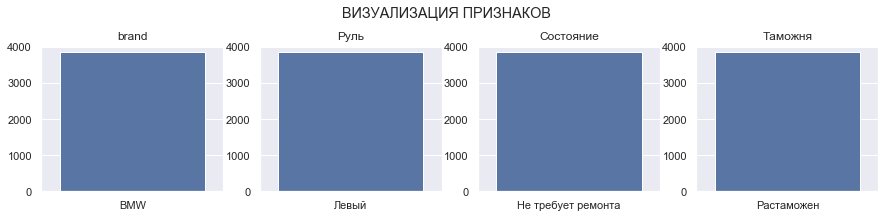

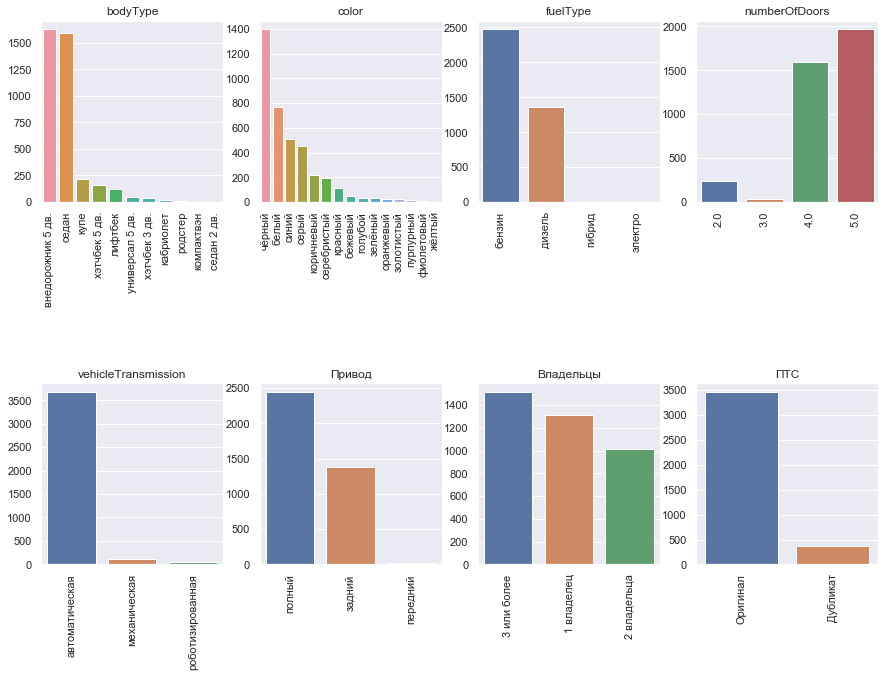

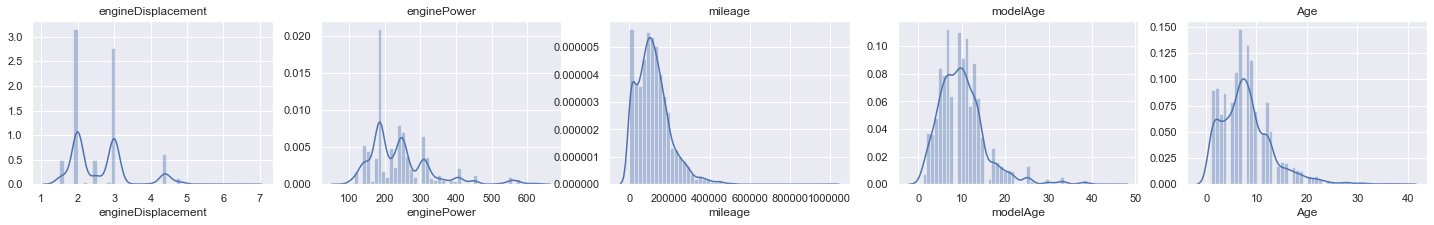

In [13]:
sns.set()
visualization(prep_test.drop(['Владение', 'Комплектация', 'description'], axis = 1))

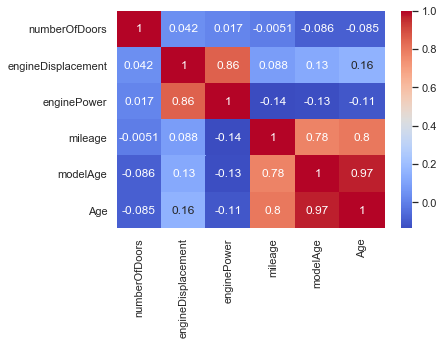

In [14]:
sns.heatmap(prep_test.corr(), annot = True, cmap = 'coolwarm')

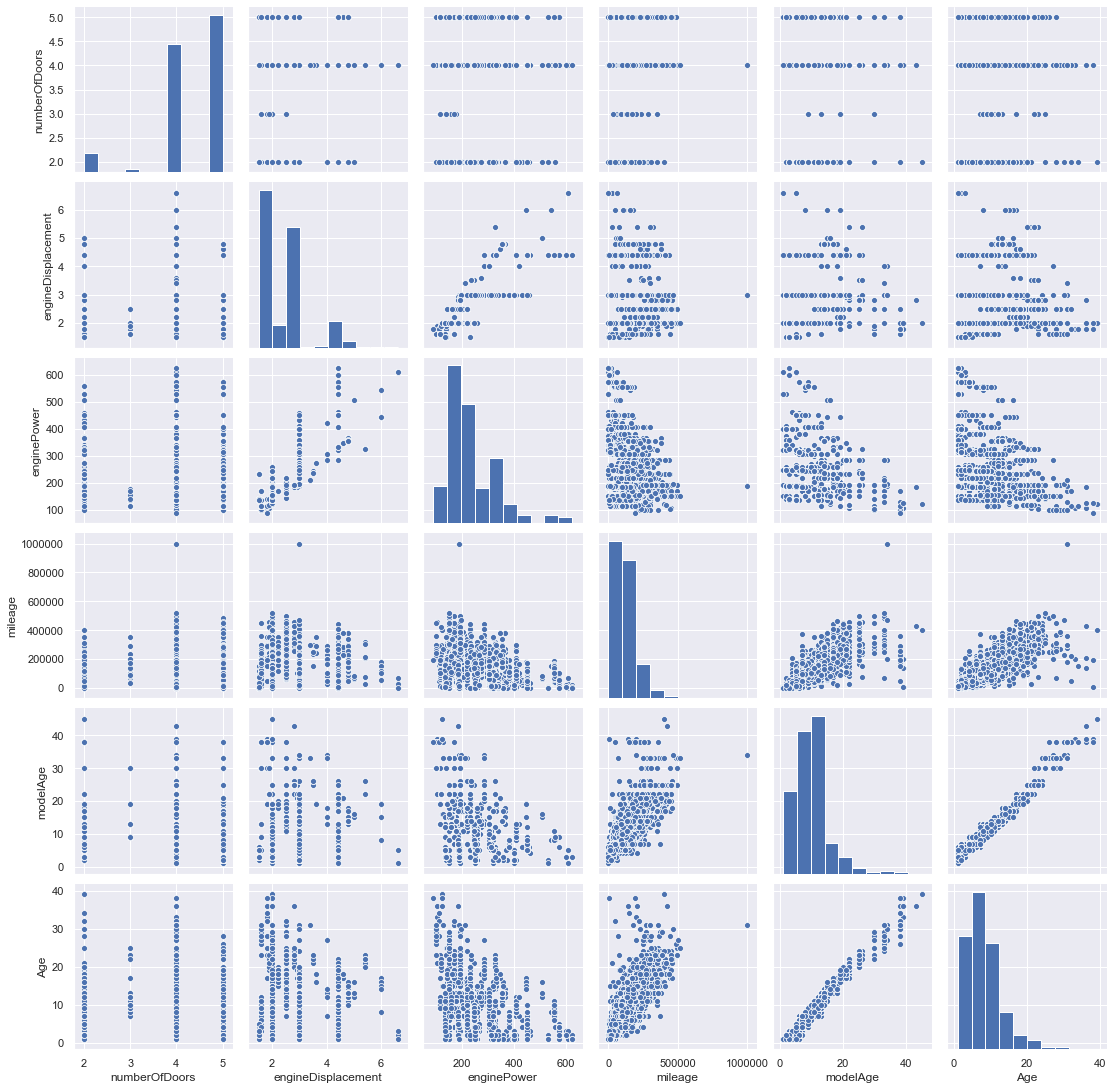

In [15]:
sns.pairplot(prep_test)

## 2. Сбор данных методом парсинга

In [16]:
from bs4 import BeautifulSoup, SoupStrainer    
import requests

In [17]:
def auto_ru_parsing(brands, cities):
    """Cобирает характеристики и цены автомобилей с сайта auto.ru
    arg brands: модели автомбилей (список)
    arg cities: российские города (список)"""
    
    features = ['bodyType', 'brand', 'color', 'fuelType', 'modelDate', 'name', 
            'numberOfDoors', 'productionDate', 'vehicleConfiguration', 
            'vehicleTransmission','engineDisplacement', 'enginePower', 
            'description', 'mileage', 'Комплектация', 'Привод', 'Руль', 
            'Состояние', 'Владельцы', 'ПТС', 'Таможня', 'Владение', 'price']
    df = pd.DataFrame(columns = features)                     
    for city in cities:
        for brand in brands:
            for i in range(1, 100):
                pages = []
                url = 'https://auto.ru/'+city+'/cars/'+brand+'/used/?output_type=list&page='+str(i)+'&sort=fresh_relevance_1-desc'   
                response = requests.get(url)  
                soup = BeautifulSoup(response.content, 'html.parser', parse_only=SoupStrainer('a', class_="Link ListingItemTitle-module__link"))
                urls = [link['href'] for link in soup if link.get('href')]
                pages += urls
                for page in pages:
                    response = requests.get(page)   
                    soup = BeautifulSoup(response.content, 'html.parser')
                    try:
                        bodyType = soup.find('meta', itemprop="bodyType")['content']
                    except:
                        bodyType = float('nan')
                    try:
                        brand = soup.find('meta', itemprop="brand")['content']
                    except:
                        brand = float('nan')
                    try:
                        color = soup.find('meta', itemprop="color")['content']
                    except:
                        color = float('nan')
                    try:
                        fuelType = soup.find('meta', itemprop="fuelType")['content']
                    except:
                        fuelType = float('nan')
                    try:
                        modelDate = soup.find('meta', itemprop="modelDate")['content']
                    except:
                        modelDate = float('nan')
                    try:
                        name = soup.find_all('meta', itemprop="name")[-1]['content']
                    except:
                        name = float('nan')
                    try:
                        numberOfDoors = soup.find('meta', itemprop="numberOfDoors")['content']
                    except:
                        numberOfDoors = float('nan')
                    try:
                        productionDate = soup.find('meta', itemprop="productionDate")['content']
                    except:
                        productionDate = float('nan')
                    try:
                        vehicleConfiguration = soup.find('meta', itemprop="vehicleConfiguration")['content']
                    except:
                        vehicleConfiguration = float('nan')
                    try:
                        vehicleTransmission = soup.find('meta', itemprop="vehicleTransmission")['content']
                    except:
                        vehicleTransmission = float('nan')
                    try:
                        engineDisplacement = soup.find('meta', itemprop="engineDisplacement")['content']
                    except:
                        engineDisplacement = float('nan')
                    try:
                        enginePower = soup.find('meta', itemprop="enginePower")['content']
                    except:
                        enginePower = float('nan')
                    try:
                        description = soup.find('meta', itemprop="description")['content']
                    except:
                        description = float('nan')
                    mileage_pattern = re.compile('\d+')
                    try: 
                        mils =mileage_pattern.findall(soup.find('li', class_="CardInfo__row CardInfo__row_kmAge").text)
                        mileage = ""
                        for mil in mils:
                            mileage += mil
                        mileage = int(mileage)
                    except:
                        mileage = float('nan')
                    complectation_pattern = re.compile('[e][q][u][i][p][m][e][n][t][G][r][o][u][p][s].+[]][}][]][}]')
                    try:
                        complectation = complectation_pattern.search(soup.find('script', id="initial-state").text)[0][17:]
                    except:
                        complectation = '[]'
                    drive_pattern = re.compile('[>][а-я]+')
                    try:
                        drive = drive_pattern.findall(str(soup.find('li', class_="CardInfo__row CardInfo__row_drive")))[0][1:]
                    except:
                        drive = float('nan')
                    try:
                        wheel = soup.find('li', class_="CardInfo__row CardInfo__row_wheel").text[4:]
                    except:
                        wheel = float('nan')
                    try:
                        state = soup.find('li', class_="CardInfo__row CardInfo__row_state").text[9:]
                    except:
                        state = float('nan')
                    try:
                        owners = soup.find('li', class_="CardInfo__row CardInfo__row_ownersCount").text[9:].replace('\xa0', ' ')
                    except:
                        owners = float('nan')
                    try:
                        pts = soup.find('li', class_="CardInfo__row CardInfo__row_pts").text[3:]
                    except:
                        pts = float('nan')
                    try:
                        customs = soup.find('li', class_="CardInfo__row CardInfo__row_customs").text[7:]
                    except:
                        customs = float('nan')
                    try:
                        owningTime = soup.find('li', class_="CardInfo__row CardInfo__row_owningTime").text[8:]
                    except:
                        owningTime = float('nan')
                    try:
                        price = soup.find('meta', itemprop="price")['content']
                    except:
                        price = float('nan')
                    df.loc[len(df)] = [bodyType, brand, color, fuelType, modelDate,
                                   name, numberOfDoors, productionDate, 
                                   vehicleConfiguration, vehicleTransmission,
                                   engineDisplacement, enginePower, description, 
                                   mileage, complectation, drive, wheel, state, 
                                   owners, pts, customs, owningTime, price]          
    df.modelDate = np.array(df.modelDate.astype(float))
    df.numberOfDoors = np.array(df.numberOfDoors.astype(float))
    df.productionDate = np.array(df.productionDate.astype(float))
    df.mileage = np.array(df.mileage.astype(float))
    df.price = np.array(df.price.astype(float))
    df.drop_duplicates(inplace = True) 
    df.reset_index(drop = True , inplace = True)
    return df

In [ ]:
train = auto_ru_parsing(['bmw'], ['moskva'])

## 3. Разведочный анализ тренировочных данных

In [18]:
train = pd.read_csv('train.csv')

In [19]:
prep_train = preprocessing(train)

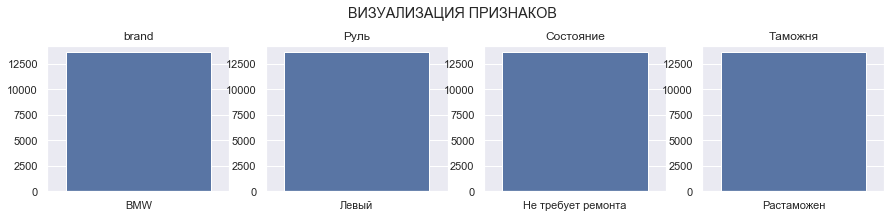

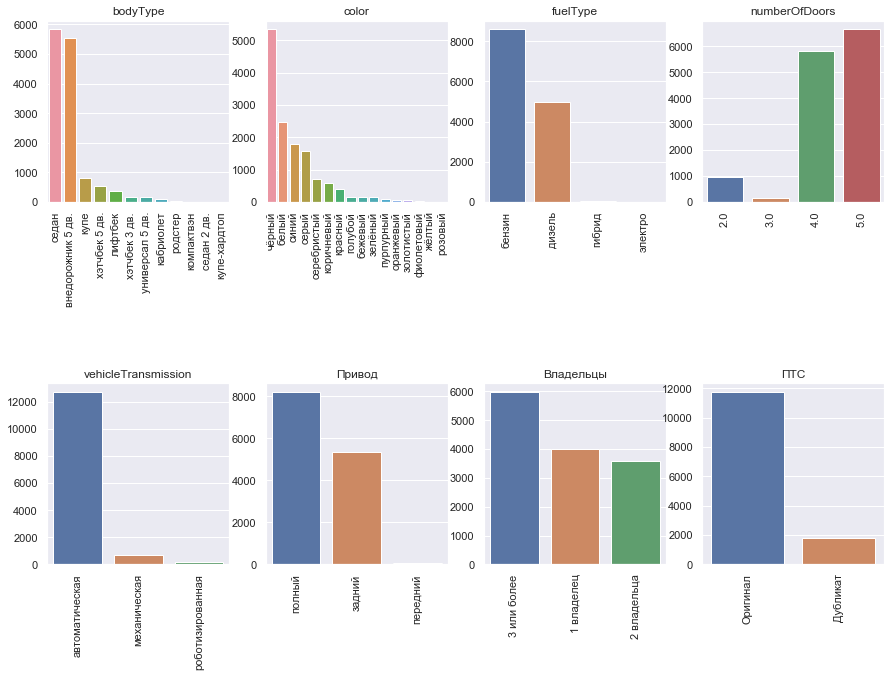

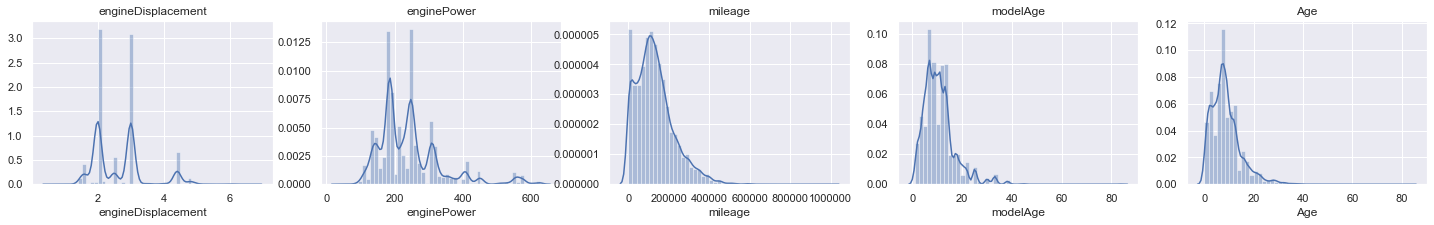

In [20]:
visualization(prep_train.drop(['Владение', 'Комплектация', 'description', 'price'], axis = 1))

#### Цена автомобиля

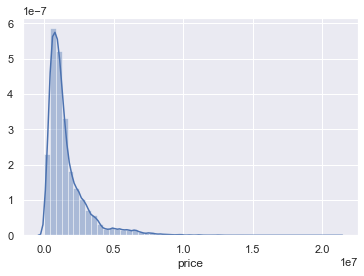

In [21]:
sns.distplot(prep_train['price'].values, axlabel = 'price')

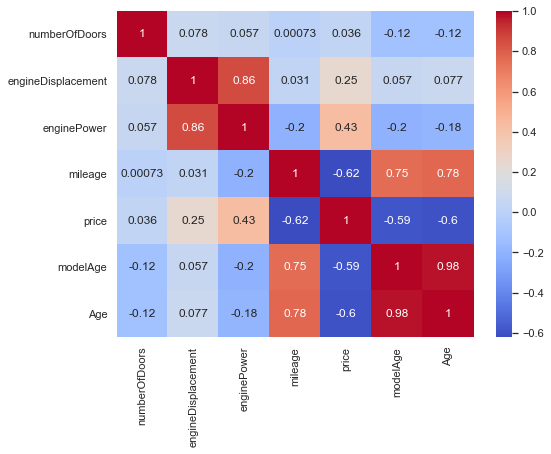

In [22]:
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(prep_train.corr(), annot = True, cmap = 'coolwarm', ax = ax)

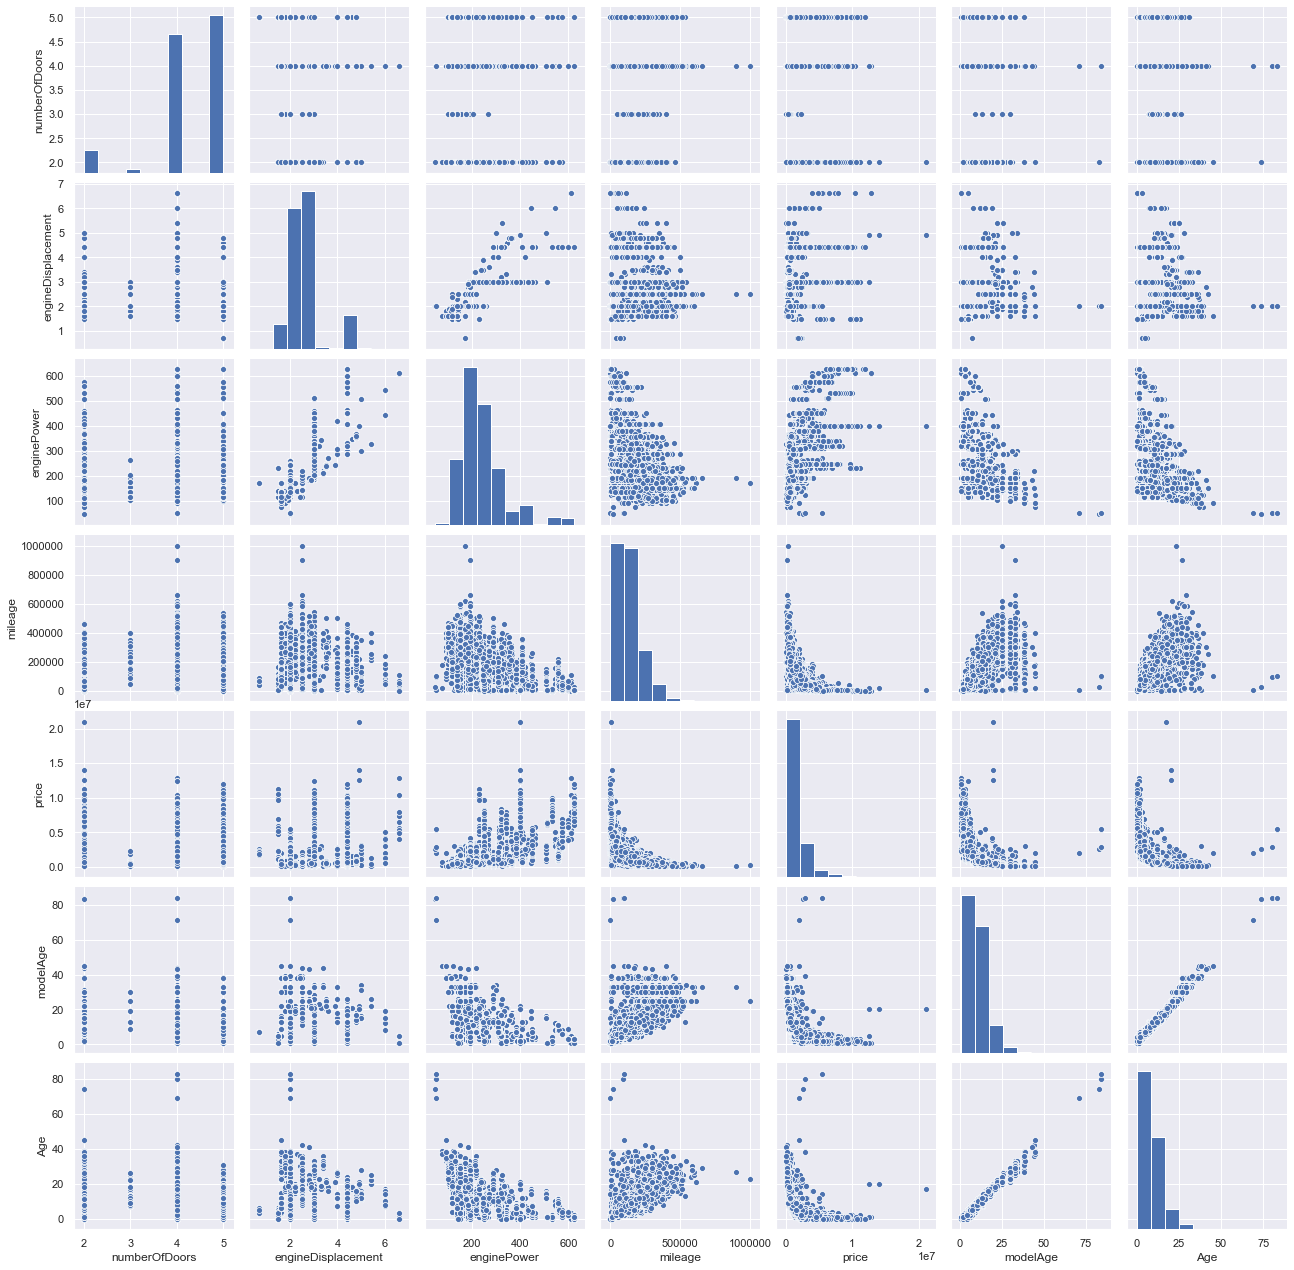

In [23]:
sns.pairplot(prep_train)

## Обработка данных перед обучением модели и предсказанием целевой переменной

In [24]:
# Средний объем двигателя для вставки на места пропусков
def engine_volume(cell):
    if 'undefined' in cell:
        return float('nan')
    else:
        return float(cell[:-4])
engine_volume_row = train['engineDisplacement'].apply(engine_volume)
mean_engine_volume = engine_volume_row.mean()

In [26]:
def processing(df_input):
    '''Осуществляет предобработку данных'''
    
    df_output = df_input.copy()
    
    df_output.drop(['brand', 'Таможня', 'Состояние', 'Руль'], axis=1, inplace=True)
    if 'id' in df_output.columns:
        df_output.drop(['id'], axis=1, inplace=True)
    
    df_output['modelDate'] = df_output['modelDate'].apply(lambda x: 2020 - x)
    df_output['productionDate'] = df_output['productionDate'].apply(lambda x: 2020 - x)
    
    # Мощность
    def power_column(cell):
        if 'л.с.' in cell:
            power_pattern_hf = re.compile('[(].+[л.с.]')
            return int(str(power_pattern_hf.findall(cell))[3:-6])
        elif 'кВт' in cell:
            power_pattern_kW = re.compile('[(].+[кВт]')
            return 1.36*int(str(power_pattern_kW.findall(cell))[3:-6])
            
    df_output['power'] = df_output['name'].apply(power_column)
    
    # Объем двигтеля
    def engine_volume(cell):
        if 'undefined' in cell:
            return float('nan')
        else:
            return float(cell[:-4])

    df_output['engineDisplacement'] = df_output['engineDisplacement'].apply(engine_volume) 
    df_output['engineDisplacement'].fillna(mean_engine_volume, inplace = True)
    
    # Комлплектация
    def complectation_column(cell):
        compl_0 = cell.replace('name','').replace('values','').replace(':','').replace('[','').replace(']','').replace('{','').replace('}','').replace(',','').replace('"Безопасность"','').replace('"Салон"','').replace('"Мультимедиа"','').replace('"Комфорт"','').replace('"Обзор"','').replace('"Защита от угона"','').replace('"Элементы экстерьера"','').replace('"Прочее"','').replace("'",'').split('"')
        compl_new = []
        for compl in compl_0:
            if compl != '':
                compl_new.append(compl)
        return compl_new

    df_output['Комплектация'] = df_output['Комплектация'].apply(complectation_column)
    
    compl_set = set()
    for i in range(df_output.shape[0]):
        for compl in df_output['Комплектация'].iloc[i]:
            compl_set.add(compl)
    
    def find_item(cell):
        if str(item) in str(cell):
            return 1
        return 0
    
    for item in compl_set:
        df_output[item] = df_output['Комплектация'].apply(find_item)
    
    
    for feature in ['vehicleTransmission','color', 
                    'fuelType','bodyType', 'name', 'vehicleConfiguration', 
                    'enginePower', 'engineDisplacement']:
        for item in set(test[feature]):
            df_output[str(item)] = df_output[feature].apply(find_item)
    
    for feature in ['Привод', 'ПТС']:
        df_output = pd.concat([df_output, 
                        pd.get_dummies(df_output[feature])], axis = 1)
    
    df_output['Владельцы'] = df_output['Владельцы'].apply(lambda x: float(x[0]))
    
    
    df_output.drop(['bodyType', 'color', 'fuelType', 'name',
                    'vehicleConfiguration', 'vehicleTransmission', 'enginePower', 'Привод', 
                    'ПТС','Комплектация', 
                    'description', 'Владение'], axis=1, inplace=True)
    
    return df_output

In [27]:
df_train = processing(train)

In [28]:
df_test = processing(test)

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13587 entries, 0 to 13586
Columns: 802 entries, modelDate to Оригинал
dtypes: float64(8), int64(789), uint8(5)
memory usage: 82.7 MB


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3837 entries, 0 to 3836
Columns: 794 entries, modelDate to Оригинал
dtypes: float64(7), int64(782), uint8(5)
memory usage: 23.1 MB


#### Выравнивание количества столбцов тестового и тренировочного датафреймов

In [31]:
to_remove = list(set(df_train.columns) - set(df_test.columns) - set(['price']))
to_remove

['Диски 24',
 'Сиденье водителя с поясничной поддержкой',
 'Диски 27',
 'Мультимедиа система с ЖК-экраном',
 'Диски 12',
 'Премиальная аудиосистема',
 'Передние сиденья с поясничной поддержкой']

In [32]:
df_train.drop(to_remove, axis = 1, inplace = True)

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13587 entries, 0 to 13586
Columns: 795 entries, modelDate to Оригинал
dtypes: float64(8), int64(782), uint8(5)
memory usage: 82.0 MB


## Обучение модели и предсказание цен тестовых авто

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
RANDOM_SEED = 42

In [36]:
X = df_train.drop(['price'], axis=1)
y = df_train.price.values

In [37]:
regr = RandomForestRegressor(n_estimators=1000,
                             max_features='auto',
                             max_depth=45,
                             oob_score = True,
                             n_jobs=-1,
                             random_state = RANDOM_SEED)

In [38]:
regr.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=45, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [39]:
regr.oob_score_.mean()

0.9694861122035524

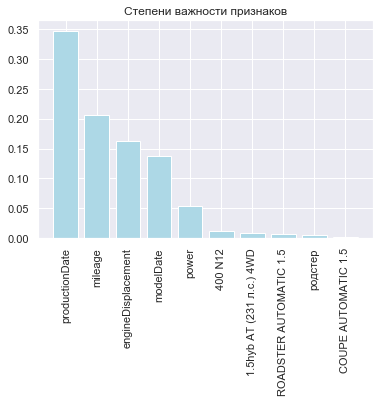

In [46]:
feat_labels = X.columns
importances = regr.feature_importances_
indices = np.argsort(importances)[:-11:-1]
plt.title('Степени важности признаков')
plt.bar(range(10), importances[indices], color = 'lightblue', align = 'center')
plt.xticks(range(10), feat_labels[indices], rotation=90)
plt.show()

In [47]:
y_pred = regr.predict(df_test)

In [48]:
y_pred_round = []
for y in y_pred:
    y_pred_round.append(round(y/10000)*10000)

In [49]:
submission = pd.read_csv('test.csv')
submission = pd.DataFrame(submission.id)
submission['price'] = y_pred_round
submission.head()

,id,price
0,0,1670000.0
1,1,2470000.0
2,2,1430000.0
3,3,2330000.0
4,4,4840000.0


In [50]:
submission.to_csv('submission.csv', index=False)
submission.head(10)

,id,price
0,0,1670000.0
1,1,2470000.0
2,2,1430000.0
3,3,2330000.0
4,4,4840000.0
5,5,2160000.0
6,6,990000.0
7,7,740000.0
8,8,1550000.0
9,9,1360000.0


In [51]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3837 entries, 0 to 3836
Data columns (total 2 columns):
id       3837 non-null int64
price    3837 non-null float64
dtypes: float64(1), int64(1)
memory usage: 60.0 KB
